In [11]:
import torch
from matplotlib import pyplot as plt
import cv2
from PIL import Image
import numpy as np
import pandas as pd
%matplotlib inline
import tensorflow as tf
from tensorflow.keras.applications.vgg16 import VGG16

# Model
#model = torch.hub.load('ultralytics/yolov5', 'yolov5s')
#model.classes = [2]
model = torch.hub.load('ultralytics/yolov5', 'custom', path='exp16/weights/best.pt', force_reload=True)
model.classes = [0]


# Images
#dir = 'https://github.com/ultralytics/yolov5/raw/master/data/images/'
width = 1280
height = 720
dim = (width, height)
img = cv2.imread('/home/hong/test/parkinglot2full.jpg')
resized = cv2.resize(img, dim)
img1 = cv2.resize(img, dim)

# Inference
results = model(resized)

# Results
results.print()  
results.save(labels=False)  # or .show()
results.show()

# Data
#print(results.xyxy[0])  # print img1 predictions (pixels)
#                   x1           y1           x2           y2   confidence        class
# tensor([[7.50637e+02, 4.37279e+01, 1.15887e+03, 7.08682e+02, 8.18137e-01, 0.00000e+00],
#         [9.33597e+01, 2.07387e+02, 1.04737e+03, 7.10224e+02, 5.78011e-01, 0.00000e+00],
#         [4.24503e+02, 4.29092e+02, 5.16300e+02, 7.16425e+02, 5.68713e-01, 2.70000e+01]])

Downloading: "https://github.com/ultralytics/yolov5/archive/master.zip" to /home/hong/.cache/torch/hub/master.zip
YOLOv5 🚀 2022-7-1 Python-3.6.9 torch-1.10.2 CPU



Python 3.7.0 required by YOLOv5, but Python 3.6.9 is currently installed


Fusing layers... 
Model summary: 213 layers, 7023610 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 


image 1/1: 720x1280 5 Cars
Speed: 37.0ms pre-process, 1232.8ms inference, 151.9ms NMS per image at shape (1, 3, 384, 640)


Saved 1 image to runs/detect/exp


In [12]:
temp=results.pandas().xyxy[0]
temp1= pd.DataFrame(temp)

In [13]:
numpy_array = temp1.to_numpy()
np.savetxt("coordinates.txt", numpy_array, fmt = "%s", delimiter=' ')

In [14]:
filename = 'coordinates.txt'
data = np.genfromtxt(filename, delimiter=' ', dtype=None, names=('x1', 'y1', 'x2', 'y2', 'conf', 'class','name'))
print(data)

[(     851.73,      270.29,      1102.7,      583.38,     0.93128, 0, b'Car') (     1177.2,      299.32,        1280,      574.09,     0.82544, 0, b'Car') (     570.07,      304.08,       824.7,      617.48,     0.79843, 0, b'Car') (     267.23,      288.02,      529.25,      610.49,     0.78492, 0, b'Car')
 (    0.12137,      281.11,      205.54,      624.58,     0.34566, 0, b'Car')]


/home/hong/parking/lib/python3.6/site-packages/ipykernel_launcher.py:2: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  


In [15]:
img = cv2.imread('/home/hong/test/parkinglot2.jpeg')
resized = cv2.resize(img, dim)
img1 = cv2.resize(img, dim)

In [16]:
model1 = tf.keras.models.load_model("/home/hong/parking/Model/saved_model.h5")
HEIGHT = 49
WIDTH = 37

In [17]:
occupied = int(0)
empty = int(0)

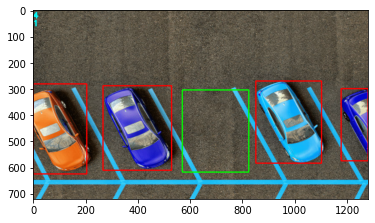

In [18]:
info1 = []
with open(filename) as input_file:
    for line in input_file:
        x1, y1, x2, y2, conf, labels, name = (
            item.strip() for item in line.rsplit(' ',6))
        info1.append (dict(zip(('labels', 'conf', 'x1', 'y1', 'x2', 'y2'),
                                (labels, conf, x1, y1, x2, y2))))
for one_info in info1:
    x1 = int(float(one_info["x1"]))
    y1 = int(float(one_info["y1"]))
    x2 = int(float(one_info["x2"]))
    y2 = int(float(one_info["y2"]))

    cropped_image = img1 [y1:y2, x1:x2]
    image = cv2.resize(cropped_image, (WIDTH, HEIGHT))
    image_x = np.expand_dims(image, axis=0)
    image_x = tf.keras.applications.vgg16.preprocess_input(image_x)
    prediction = model1.predict(image_x)
    prediction = np.squeeze(prediction)

    if prediction> 0.8:
        cv2.rectangle(img1, (x1, y1), (x2, y2),(255, 0, 0), 3)
        occupied = occupied + 1
        
    else:
        cv2.rectangle(img1, (x1, y1), (x2, y2),(0, 255, 0), 3)
        empty = empty + 1
      
font = cv2.FONT_HERSHEY_SIMPLEX
cv2.putText(img1, str(occupied),
            (0, 30), font,
            1, (0, 255, 255),
            4, cv2.LINE_AA)
cv2.putText(img1, str(empty),
            (0, 60), font,
            1, (0, 255, 255),
            4, cv2.LINE_AA)
plt.imshow(img1)